<a href="https://colab.research.google.com/github/Megancodes2017/Megancodes2017/blob/main/Aaron_Nola_Trends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pybaseball

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 426.1/426.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.7/432.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 15.4 MB/s eta 0:00:00


In [2]:
from pybaseball import statcast_pitcher, playerid_lookup
import pandas as pd

In [3]:
playerid_lookup('nola', 'aaron')

Gathering player lookup table. This may take a moment.


,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,nola,aaron,605400,nolaa001,nolaaa01,16149,2015.0,2025.0


In [4]:
nola_id = 605400

In [28]:
# Pull data from last 5 starts from IL
starts = statcast_pitcher('2025-08-17', '2025-09-08', nola_id)

Gathering Player Data


In [29]:
summary = (
    starts.groupby(['game_date', 'pitch_type'])
    .agg(
        usage=('pitch_type', 'count'),
        velo=('release_speed', 'mean'),
        spin=('release_spin_rate', 'mean'),
        horiz_mov=('pfx_x', 'mean'),
        vert_mov=('pfx_z', 'mean'),
        release_x=('release_pos_x', 'mean'),
        release_z=('release_pos_z', 'mean'),
        whiff_rate=('description', lambda x: (x.isin(['swinging_strike', 'swinging_strike_blocked']).mean())),
        hard_hit_rate=('launch_speed', lambda x: (x >= 95).mean() if x.notna().any() else None)
    )
    .reset_index()

)

In [30]:
summary['usage'] = summary.groupby('game_date')['usage'].transform(lambda x: x / x.sum())

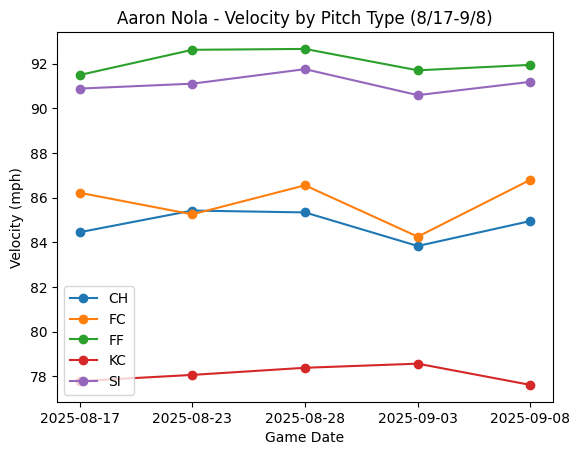

In [31]:
import matplotlib.pyplot as plt

for pitch in summary['pitch_type'].unique():
  data = summary[summary['pitch_type'] == pitch]
  plt.plot(data['game_date'], data['velo'], marker='o', label=pitch)

plt.title('Aaron Nola - Velocity by Pitch Type (8/17-9/8)')
plt.xlabel('Game Date')
plt.ylabel('Velocity (mph)')
plt.legend()
plt.show()

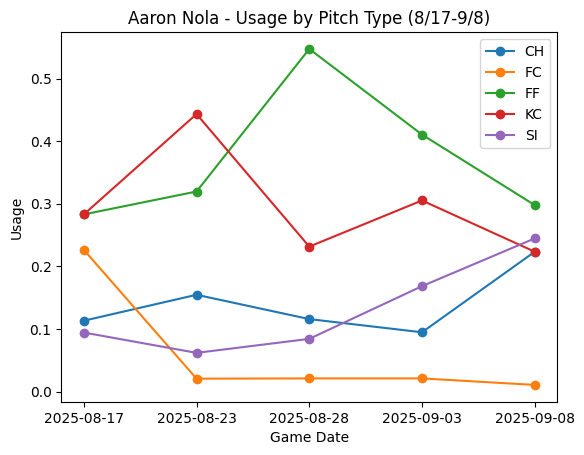

In [32]:
# Usage
for pitch in summary['pitch_type'].unique():
  data = summary[summary['pitch_type'] == pitch]
  plt.plot(data['game_date'], data['usage'], marker='o', label=pitch)

plt.title('Aaron Nola - Usage by Pitch Type (8/17-9/8)')
plt.xlabel('Game Date')
plt.ylabel('Usage')
plt.legend()
plt.show()

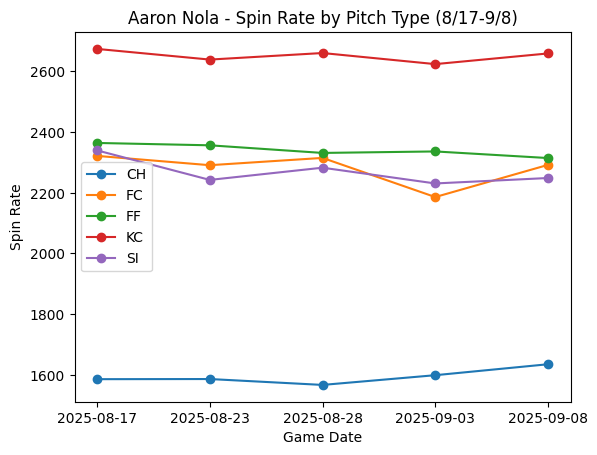

In [34]:
for pitch in summary['pitch_type'].unique():
  data = summary[summary['pitch_type'] == pitch]
  plt.plot(data['game_date'], data['spin'], marker='o', label=pitch)

plt.title('Aaron Nola - Spin Rate by Pitch Type (8/17-9/8)')
plt.xlabel('Game Date')
plt.ylabel('Spin Rate')
plt.legend()
plt.show()

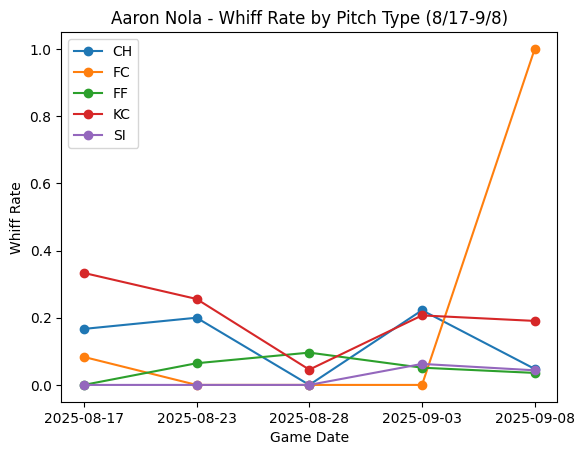

In [35]:
# Whiff Rate
for pitch in summary['pitch_type'].unique():
  data = summary[summary['pitch_type'] == pitch]
  plt.plot(data['game_date'], data['whiff_rate'], marker='o', label=pitch)

plt.title('Aaron Nola - Whiff Rate by Pitch Type (8/17-9/8)')
plt.xlabel('Game Date')
plt.ylabel('Whiff Rate')
plt.legend()
plt.show()

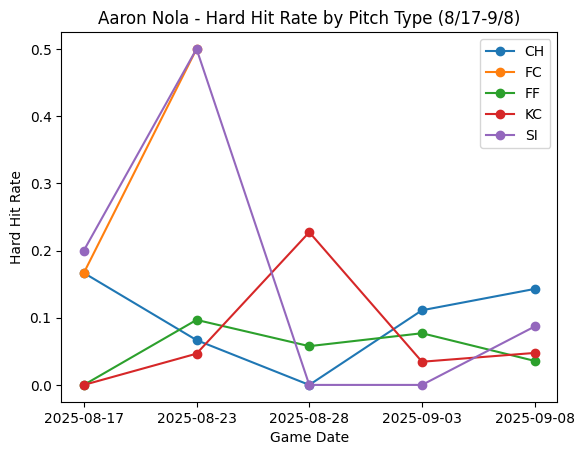

In [36]:
# Hard Hit Rate
for pitch in summary['pitch_type'].unique():
  data = summary[summary['pitch_type'] == pitch]
  plt.plot(data['game_date'], data['hard_hit_rate'], marker='o', label=pitch)

plt.title('Aaron Nola - Hard Hit Rate by Pitch Type (8/17-9/8)')
plt.xlabel('Game Date')
plt.ylabel('Hard Hit Rate')
plt.legend()
plt.show()

In [14]:
# Compare Nola starts on 9/3 and 9/8
start1 = statcast_pitcher('2025-09-03', '2025-09-03', nola_id)
start1['game_date'] = '2025-09-03'

start2 = statcast_pitcher('2025-09-08', '2025-09-08', nola_id)
start2['game_date'] = '2025-09-08'

# Combine the 2 starts
games = pd.concat([start1, start2], ignore_index=True)

Gathering Player Data
Gathering Player Data


In [15]:
# Summarizing pitch characertistics per game
comparison = (
    games.groupby(['game_date', 'pitch_type'])
    .agg(
        usage=('pitch_type', 'count'),
        velo=('release_speed', 'mean'),
        spin=('release_spin_rate', 'mean'),
        horiz_mov=('pfx_x', 'mean'),
        vert_mov=('pfx_z', 'mean'),
        release_x=('release_pos_x', 'mean'),
        release_z=('release_pos_z', 'mean'),
        whiff_rate=('description', lambda x: (x.isin(['swinging_strike', 'swinging_strike_blocked']).mean())),
        hard_hit_rate=('launch_speed', lambda x: (x >= 95).mean() if x.notna().any() else None)
    )
    .reset_index()
)

In [16]:
# Normalize usage % within each game
comparison['usage'] = comparison.groupby('game_date')['usage'].transform(lambda x: x / x.sum())

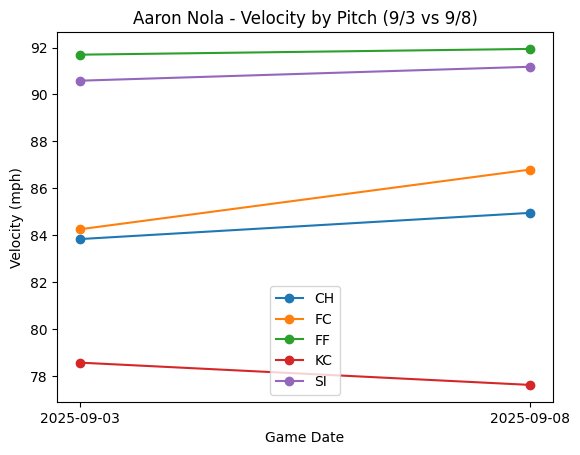

In [37]:
import matplotlib.pyplot as plt

# Velocity
for pitch in comparison['pitch_type'].unique():
  data = comparison[comparison['pitch_type'] == pitch]
  plt.plot(data['game_date'], data['velo'], marker='o', label=pitch)

plt.title('Aaron Nola - Velocity by Pitch (9/3 vs 9/8)')
plt.xlabel('Game Date')
plt.ylabel('Velocity (mph)')
plt.legend()
plt.show()

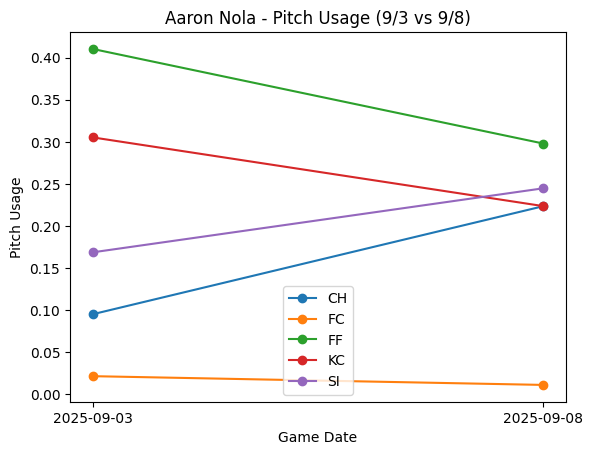

In [24]:
# Usage
for pitch in comparison['pitch_type'].unique():
  data = comparison[comparison['pitch_type'] == pitch]
  plt.plot(data['game_date'], data['usage'], marker='o', label=pitch)

plt.title('Aaron Nola - Pitch Usage (9/3 vs 9/8)')
plt.xlabel('Game Date')
plt.ylabel('Pitch Usage')
plt.legend()
plt.show()

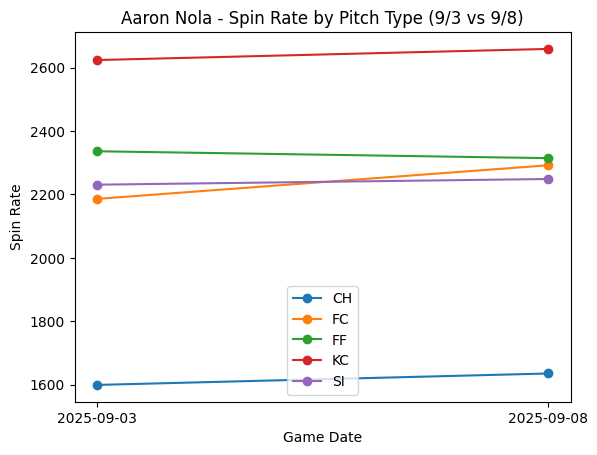

In [23]:
# Spin Rate
for pitch in comparison['pitch_type'].unique():
  data = comparison[comparison['pitch_type'] == pitch]
  plt.plot(data['game_date'], data['spin'], marker='o', label=pitch)

plt.title('Aaron Nola - Spin Rate by Pitch Type (9/3 vs 9/8)')
plt.xlabel('Game Date')
plt.ylabel('Spin Rate')
plt.legend()
plt.show()

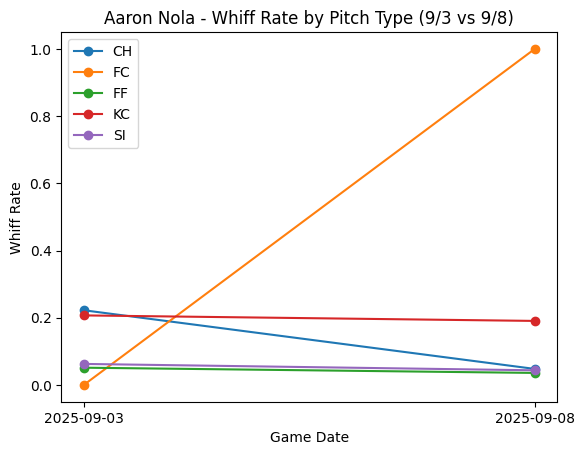

In [22]:
# Whiff Rate
for pitch in comparison['pitch_type'].unique():
  data = comparison[comparison['pitch_type'] == pitch]
  plt.plot(data['game_date'], data['whiff_rate'], marker='o', label=pitch)

plt.title('Aaron Nola - Whiff Rate by Pitch Type (9/3 vs 9/8)')
plt.xlabel('Game Date')
plt.ylabel('Whiff Rate')
plt.legend()
plt.show()

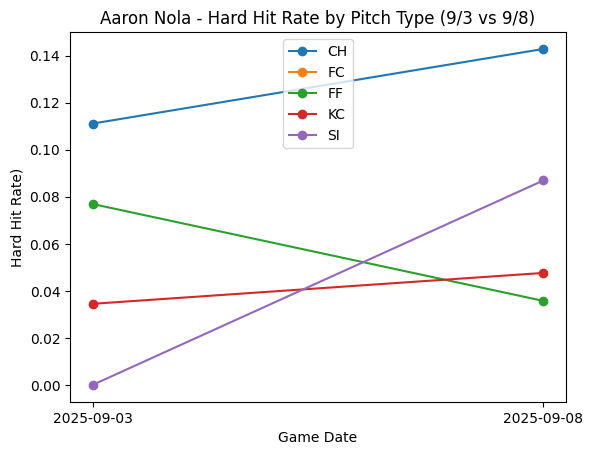

In [25]:
# Hard hit rate
for pitch in comparison['pitch_type'].unique():
  data = comparison[comparison['pitch_type'] == pitch]
  plt.plot(data['game_date'], data['hard_hit_rate'], marker='o', label=pitch)

plt.title('Aaron Nola - Hard Hit Rate by Pitch Type (9/3 vs 9/8)')
plt.xlabel('Game Date')
plt.ylabel('Hard Hit Rate)')
plt.legend()
plt.show()